In [5]:
!pip install yfinance
!pip install statsmodels

import yfinance as yf

from statsmodels.tsa.seasonal import seasonal_decompose
from statsmodels.tsa.stattools import adfuller

import pandas as pd
import numpy as np
from sklearn.preprocessing import MinMaxScaler
import matplotlib.pyplot as plt

# Load data
df = yf.download("AAPL", start="2020-01-01", end="2024-12-31")
df.head()

# !!!! the error strats occuring from lines ->
#df = df[['Date', 'Close']]
#df['Date'] = pd.to_datetime(df['Date'])
#df.set_index('Date', inplace=True)

# Normalize
#scaler = MinMaxScaler()
#df['Close'] = scaler.fit_transform(df[['Close']])


[*********************100%***********************]  1 of 1 completed


Price,Close,High,Low,Open,Volume
Ticker,AAPL,AAPL,AAPL,AAPL,AAPL
Date,,,,,
2020-01-02,72.620842,72.681289,71.373218,71.627092,135480400
2020-01-03,71.914803,72.676431,71.689942,71.847102,146322800
2020-01-06,72.487869,72.526556,70.783271,71.034732,118387200
2020-01-07,72.146935,72.753816,71.926907,72.497522,108872000
2020-01-08,73.307518,73.609752,71.849540,71.849540,132079200


the above error occurs because it is a multilevel model , we need to clean it and make it thr row-column format, so we use a command called reset_index()

In [6]:
df.reset_index(inplace=True)
df.head()

Price,Date,Close,High,Low,Open,Volume
Ticker,,AAPL,AAPL,AAPL,AAPL,AAPL
0,2020-01-02,72.620842,72.681289,71.373218,71.627092,135480400
1,2020-01-03,71.914803,72.676431,71.689942,71.847102,146322800
2,2020-01-06,72.487869,72.526556,70.783271,71.034732,118387200
3,2020-01-07,72.146935,72.753816,71.926907,72.497522,108872000
4,2020-01-08,73.307518,73.609752,71.849540,71.849540,132079200


In [7]:
df = df[['Date', 'Close']]
df['Date'] = pd.to_datetime(df['Date'])
df.set_index('Date', inplace=True)

#Normalize
scaler = MinMaxScaler()
df['Close'] = scaler.fit_transform(df[['Close']])


CREATING SEQUENCE FOR LSTM

In [8]:
# Create sequences
def create_sequences(data, seq_len=50):
    X, y = [], []
    for i in range(len(data) - seq_len):
        X.append(data[i:i+seq_len])
        y.append(data[i+seq_len])
    return np.array(X), np.array(y)

data = df['Close'].values
X, y = create_sequences(data)

# Reshape for LSTM [samples, time steps, features]
X = X.reshape((X.shape[0], X.shape[1], 1))

In [9]:
!pip install tensorflow



/Users/srijatanandy/Documents/ai-journey/venv/lib/python3.11/site-packages/keras/src/layers/rnn/rnn.py:199: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


Model: "sequential_1"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ lstm (LSTM)                     │ (None, 50)             │        10,400 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense (Dense)                   │ (None, 1)              │            51 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 10,451 (40.82 KB)

 Trainable params: 10,451 (40.82 KB)

 Non-trainable params: 0 (0.00 B)

Epoch 1/10
38/38 ━━━━━━━━━━━━━━━━━━━━ 1s 8ms/step - loss: 0.0411
Epoch 2/10
38/38 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step - loss: 0.0012
Epoch 3/10
38/38 ━━━━━━━━━━━━━━━━━━━━ 0s 8ms/step - loss: 6.5437e-04
Epoch 4/10
38/38 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step - loss: 6.7982e-04
Epoch 5/10
38/38 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step - loss: 6.2435e-04
Epoch 6/10
38/38 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step - loss: 5.8656e-04
Epoch 7/10
38/38 ━━━━━━━━━━━━━━━━━━━━ 0s 8ms/step - loss: 5.8498e-04
Epoch 8/10
38/38 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step - loss: 5.2148e-04
Epoch 9/10
38/38 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step - loss: 5.4476e-04
Epoch 10/10
38/38 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step - loss: 5.3526e-04
38/38 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step


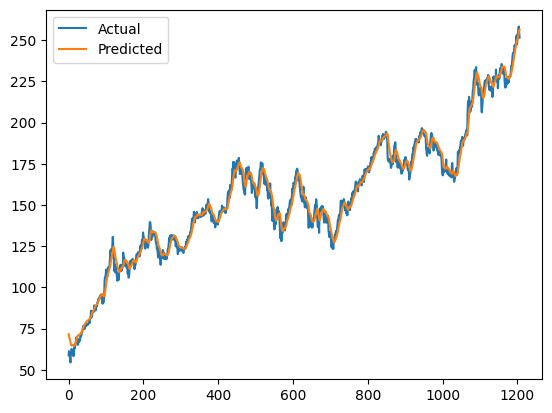

In [10]:
from keras.models import Sequential
from keras.layers import LSTM, Dense

model = Sequential()
model.add(LSTM(50, return_sequences=False, input_shape=(X.shape[1], 1)))
model.add(Dense(1))
model.compile(optimizer='adam', loss='mean_squared_error')

model.summary()
model.fit(X, y, epochs=10, batch_size=32)

# Predictions
predicted = model.predict(X)
predicted_prices = scaler.inverse_transform(predicted)
actual_prices = scaler.inverse_transform(y.reshape(-1, 1))

# Plot
plt.plot(actual_prices, label='Actual')
plt.plot(predicted_prices, label='Predicted')
plt.legend()
plt.show()

In [11]:
from sklearn.metrics import mean_squared_error
rmse = np.sqrt(mean_squared_error(actual_prices, predicted_prices))
print("RMSE:", rmse)


RMSE: 4.531604436530677
